# Evaluation Notebook

In diesem Notebook ist die Codebase beschrieben.

Das Training (5-Fold Cross-Validation) kann durch folgende Befehle ausgeführt werden:
```bash
python src/train.py --model show_tell --checkpoint_dir show_tell_fold0 --eval_fold 0 --epochs 10
python src/train.py --model show_tell --checkpoint_dir show_tell_fold1 --eval_fold 1 --epochs 10
python src/train.py --model show_tell --checkpoint_dir show_tell_fold2 --eval_fold 2 --epochs 10
python src/train.py --model show_tell --checkpoint_dir show_tell_fold3 --eval_fold 3 --epochs 10
python src/train.py --model show_tell --checkpoint_dir show_tell_fold4 --eval_fold 4 --epochs 10

python src/train.py --model show_attend_tell --checkpoint_dir show_attend_tell_fold0 --eval_fold 0 --epochs 10
python src/train.py --model show_attend_tell --checkpoint_dir show_attend_tell_fold1 --eval_fold 1 --epochs 10
python src/train.py --model show_attend_tell --checkpoint_dir show_attend_tell_fold2 --eval_fold 2 --epochs 10
python src/train.py --model show_attend_tell --checkpoint_dir show_attend_tell_fold3 --eval_fold 3 --epochs 10
python src/train.py --model show_attend_tell --checkpoint_dir show_attend_tell_fold4 --eval_fold 4 --epochs 10
```

In [1]:
import wandb
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# model checkpoint artefacts generated during 5-fold cv trained using commands from above 
model_artefacts = {
    "show_tell": {
        0: "model-show_tell_20250107_012408_fold0:v0",
        1: "model-show_tell_20250107_014557_fold1:v0",
        2: "model-show_tell_20250107_020657_fold2:v0",
        3: "model-show_tell_20250107_022823_fold3:v0",
        4: "model-show_tell_20250107_024856_fold4:v0"
    },
    "show_attend_tell": {
        0: "model-show_attend_tell_20250107_030953_fold0:v0",
        1: "model-show_attend_tell_20250107_035920_fold1:v0",
        2: "model-show_attend_tell_20250107_044723_fold2:v0",
        3: "model-show_attend_tell_20250107_053559_fold3:v0",
        4: "model-show_attend_tell_20250107_062503_fold4:v0"
    }
}

In [3]:
# evaluate each artefact using the following command
# python eval.py --model [show_tell/show_attend_tell] --eval_fold [fold] --wandb_project image-captioning-comparison --wandb_artifact [artifact_name:version]
cmds = []
for model_name, folds in model_artefacts.items():
    for fold, artifact in folds.items():
        cmd = ["python", "eval.py", "--model", model_name, "--eval_fold", str(fold), "--wandb_project", "image-captioning-comparison", "--wandb_artifact", artifact]
        cmds.append(" ".join(cmd))

print(" && ".join(cmds))

python eval.py --model show_tell --eval_fold 0 --wandb_project image-captioning-comparison --wandb_artifact model-show_tell_20250107_012408_fold0:v0 && python eval.py --model show_tell --eval_fold 1 --wandb_project image-captioning-comparison --wandb_artifact model-show_tell_20250107_014557_fold1:v0 && python eval.py --model show_tell --eval_fold 2 --wandb_project image-captioning-comparison --wandb_artifact model-show_tell_20250107_020657_fold2:v0 && python eval.py --model show_tell --eval_fold 3 --wandb_project image-captioning-comparison --wandb_artifact model-show_tell_20250107_022823_fold3:v0 && python eval.py --model show_tell --eval_fold 4 --wandb_project image-captioning-comparison --wandb_artifact model-show_tell_20250107_024856_fold4:v0 && python eval.py --model show_attend_tell --eval_fold 0 --wandb_project image-captioning-comparison --wandb_artifact model-show_attend_tell_20250107_030953_fold0:v0 && python eval.py --model show_attend_tell --eval_fold 1 --wandb_project imag

In [4]:
results = {
    "show_tell": {
        0: "v7o350sb",
        1: "86dr1hfe",
        2: "pl0pdryz",
        3: "xj4hhys9",
        4: "l2fxfljm"
    },
    "show_attend_tell": {
        0: "l9ti2727",
        1: "rv1d3nhp",
        2: "s3arun67",
        3: "u2maw7nc",
        4: "u6gvher4"
    }
}

In [14]:
api = wandb.Api()

# Initialize an empty list to store logs
all_logs = []

# Iterate through the results to fetch logs for each model and fold
for model_name, folds in results.items():
    for fold, run_id in folds.items():
        # run is specified by <entity>/<project>/<run_id>
        run = api.run(f"florin-barbisch/image-captioning-comparison/runs/{run_id}")

        # Fetch the logs for beam_bleu1
        logs = run.history()
        # Remove test_attention_comparison column if it exists
        if 'test_attention_comparison' in logs.columns:
            logs = logs.drop('test_attention_comparison', axis=1)
        logs = logs.drop(['_step', '_timestamp', '_runtime'], axis=1)
            
        # Drop rows with any NaN values
        logs = logs.dropna()

        # Adding model and fold columns to the DataFrame
        logs['model'] = model_name
        logs['fold'] = fold
        
        # Append the logs to the list
        all_logs.append(logs)

# Concatenate all logs into one big DataFrame
final_logs_df = pd.concat(all_logs, ignore_index=True)

final_logs_df

True
True
True
True
True
True
True
True
True
True


,beam_bleu4,beam_bleu2,beam_bleu1,greedy_bleu4,greedy_bleu1,greedy_bleu2,beam_bleu3,greedy_bleu3,model,fold
0,2.349674,11.070336,26.583963,2.395733,26.274515,10.253199,4.918598,4.647314,show_tell,0
1,2.943411,12.033919,27.815485,3.333721,29.208190,13.141051,5.584594,6.272646,show_tell,1
2,5.350972,17.707542,36.487400,6.282998,37.354106,18.891501,9.544489,10.547767,show_tell,2
3,3.066480,11.732283,27.785568,2.775389,27.449145,11.794876,5.702732,5.358804,show_tell,3
4,5.586874,19.517838,39.332834,4.693676,38.008324,17.722524,10.005622,8.547539,show_tell,4
5,23.014137,46.130817,65.911432,19.323275,61.869313,42.027353,32.816416,28.929363,show_attend_tell,0
6,21.515930,45.621513,65.827675,19.958961,63.630449,43.640017,31.948714,30.053048,show_attend_tell,1
7,21.016834,44.077462,65.055249,18.477032,61.468179,41.259122,30.829864,28.012411,show_attend_tell,2
8,20.917201,44.181150,64.598214,18.238447,62.065718,41.583792,30.699419,27.744321,show_attend_tell,3
9,21.500554,45.521495,65.925319,18.202180,61.526215,41.275949,31.769815,27.937921,show_attend_tell,4


In [15]:

# Identify beam and greedy columns
beam_cols = [col for col in final_logs_df.columns if col.startswith('beam_')]
greedy_cols = [col for col in final_logs_df.columns if col.startswith('greedy_')]

# Create separate dataframes for beam and greedy metrics
beam_df = final_logs_df[['model', 'fold'] + beam_cols].copy()
greedy_df = final_logs_df[['model', 'fold'] + greedy_cols].copy()

# Rename columns to remove prefixes
beam_df.columns = ['model', 'fold'] + [col.replace('beam_', '') for col in beam_cols]
greedy_df.columns = ['model', 'fold'] + [col.replace('greedy_', '') for col in greedy_cols]

# Add mode column
beam_df['mode'] = 'beam'
greedy_df['mode'] = 'greedy'

# Combine and melt the dataframes
final_melted_df = pd.concat([beam_df, greedy_df])
final_melted_df = final_melted_df.melt(
    id_vars=['model', 'fold', 'mode'],
    var_name='metric',
    value_name='score'
)

final_melted_df

,model,fold,mode,metric,score
0,show_tell,0,beam,bleu4,2.349674
1,show_tell,1,beam,bleu4,2.943411
2,show_tell,2,beam,bleu4,5.350972
3,show_tell,3,beam,bleu4,3.066480
4,show_tell,4,beam,bleu4,5.586874
...,...,...,...,...,...
75,show_attend_tell,0,greedy,bleu3,28.929363
76,show_attend_tell,1,greedy,bleu3,30.053048
77,show_attend_tell,2,greedy,bleu3,28.012411
78,show_attend_tell,3,greedy,bleu3,27.744321


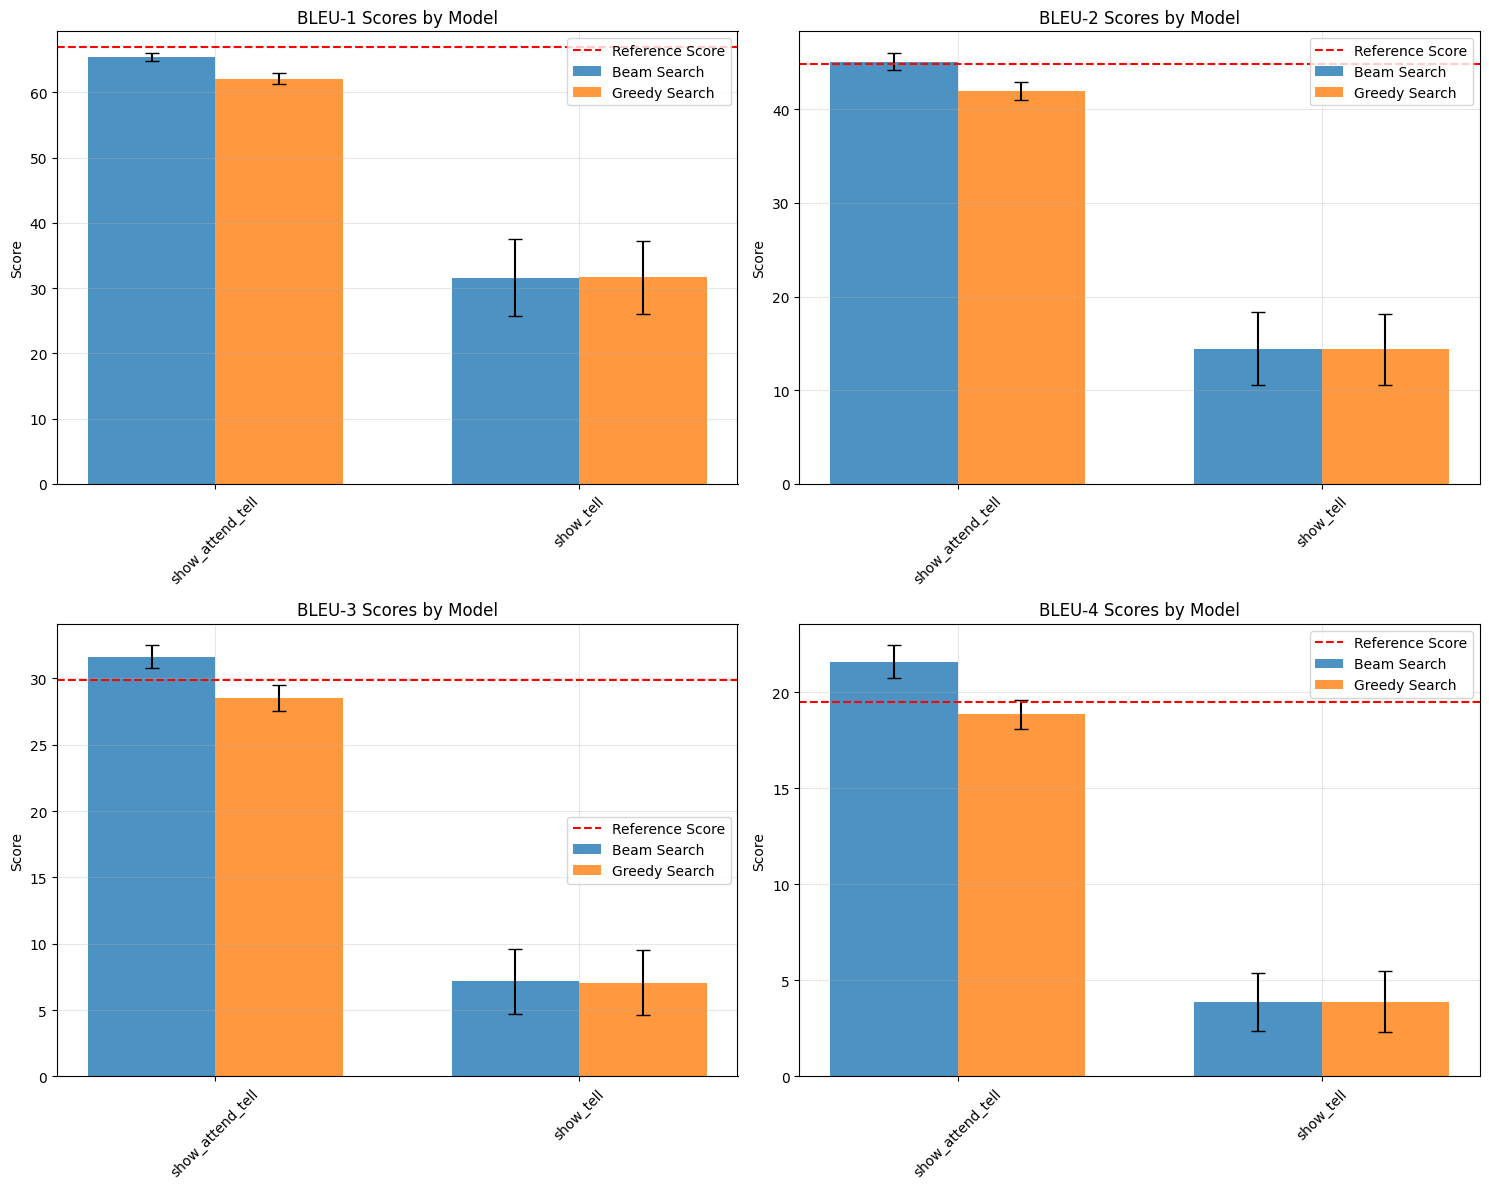

In [18]:
# Reference scores from show_attend_tell paper (Softattention on Flickr8k)
reference_scores = {
    'bleu1': 67.0,
    'bleu2': 44.8, 
    'bleu3': 29.9,
    'bleu4': 19.5
}

# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Plot each BLEU score
for idx, metric in enumerate(['bleu1', 'bleu2', 'bleu3', 'bleu4']):
    # Calculate mean and std for each model/mode combination
    plot_data = final_melted_df[final_melted_df['metric'] == metric].groupby(['model', 'mode'])['score'].agg(['mean', 'std']).reset_index()
    
    # Plot bars with error bars
    x = np.arange(len(plot_data['model'].unique()))
    width = 0.35
    
    beam_data = plot_data[plot_data['mode'] == 'beam']
    greedy_data = plot_data[plot_data['mode'] == 'greedy']
    
    axes[idx].bar(x - width/2, beam_data['mean'], width, yerr=beam_data['std'], 
                 label='Beam Search', capsize=5, alpha=0.8)
    axes[idx].bar(x + width/2, greedy_data['mean'], width, yerr=greedy_data['std'],
                 label='Greedy Search', capsize=5, alpha=0.8)
    
    # Add reference line
    axes[idx].axhline(y=reference_scores[metric], color='r', linestyle='--', 
                     label='Reference Score')
    
    # Customize plot
    axes[idx].set_title(f'BLEU-{metric[-1]} Scores by Model')
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels(plot_data['model'].unique(), rotation=45)
    axes[idx].set_ylabel('Score')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
